from data_preprocessing.DataLoader import DataLoader

In [459]:
d = DataLoader.load_data_from_path("data")

In [460]:
products = d.products

In [461]:
categories = products.category_path.str.split(';', expand=True)

In [462]:
products = pd.concat([products, categories], axis=1)
products = products.drop(columns=['category_path'])

In [463]:

products = products.rename(columns= {0: "primary_category", 1 :"secondary_category", 2 : "tertiary_category", 3 : "quaternary_category"})

In [464]:
products

,product_id,product_name,price,primary_category,secondary_category,tertiary_category,quaternary_category
0,1001,Telefon Siemens Gigaset DA310,58.97,Telefony i akcesoria,Telefony stacjonarne,None,None
1,1002,Kyocera FS-1135MFP,2048.50,Komputery,Drukarki i skanery,Biurowe urządzenia wielofunkcyjne,None
2,1003,Kyocera FS-3640MFP,7639.00,Komputery,Drukarki i skanery,Biurowe urządzenia wielofunkcyjne,None
3,1004,Fallout 3 (Xbox 360),49.99,Gry i konsole,Gry na konsole,Gry Xbox 360,None
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),-49.99,Gry i konsole,Gry na konsole,Gry Xbox 360,None
...,...,...,...,...,...,...,...
314,1315,Jabra Talk,54.99,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy słuchawkowe,None
315,1316,Plantronics Voyager Legend,249.00,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy słuchawkowe,None
316,1317,Plantronics Savi W740,1303.96,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy słuchawkowe,None
317,1318,Plantronics Savi W710,553.00,Sprzęt RTV,Audio,Słuchawki,None


In [465]:
products.dtypes

product_id               int64
product_name            object
price                  float64
primary_category        object
secondary_category      object
tertiary_category       object
quaternary_category     object
dtype: object

In [466]:
products.describe()

,product_id,price
count,319.000000,3.190000e+02
mean,1160.000000,4.326188e+06
std,92.231593,4.010396e+07
min,1001.000000,-7.990000e+02
25%,1080.500000,2.494500e+01
50%,1160.000000,4.990000e+01
75%,1239.500000,1.126350e+02
max,1319.000000,6.887800e+08


In [467]:
deliveries = d.deliveries

In [468]:
deliveries

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-02-16 22:56:36,2021-02-21 00:39:10.536911,360.0
1,20002,2021-02-24 00:56:14,2021-02-27 14:05:55.281323,360.0
2,20003,2021-03-15 03:08:10,NaT,620.0
3,20004,2021-03-10 21:08:11,NaT,516.0
4,20005,2021-01-04 08:12:08,2021-01-03 05:46:20.558336,620.0
...,...,...,...,...
7035,27036,2021-01-13 23:58:40,2021-01-18 11:55:22.010087,516.0
7036,27037,2021-01-14 03:48:43,2021-01-16 15:59:29.566011,620.0
7037,27038,2021-02-25 12:52:33,2021-02-26 01:49:17.857426,516.0
7038,27039,2021-01-07 15:36:47,2021-01-05 12:16:35.844528,360.0


In [469]:
deliveries.dtypes

purchase_id                    int64
purchase_timestamp    datetime64[ns]
delivery_timestamp    datetime64[ns]
delivery_company             float64
dtype: object

In [470]:
deltas =  deliveries.delivery_timestamp - deliveries.purchase_timestamp 

In [471]:
deltas_clean = deltas.dropna()

In [472]:
import pandas as pd
import matplotlib.pyplot as plt

In [473]:
deltas_clean

0        4 days 01:42:34.536911
1        3 days 13:09:41.281323
4      -2 days +21:34:12.558336
5        3 days 18:44:40.044368
6        0 days 08:48:38.427193
                 ...           
7035     4 days 11:56:42.010087
7036     2 days 12:10:46.566011
7037     0 days 12:56:44.857426
7038   -3 days +20:39:48.844528
7039   -1 days +15:20:47.532694
Length: 6672, dtype: timedelta64[ns]

In [474]:
deltas_clean_abs = deltas_clean.abs()

<AxesSubplot:ylabel='Frequency'>

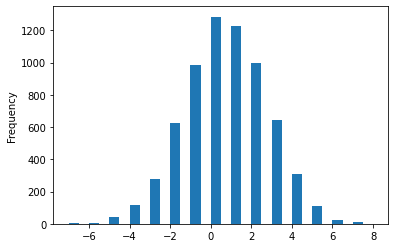

In [475]:
deltas_clean.astype('timedelta64[D]').plot.hist(bins = 30)

<AxesSubplot:ylabel='Frequency'>

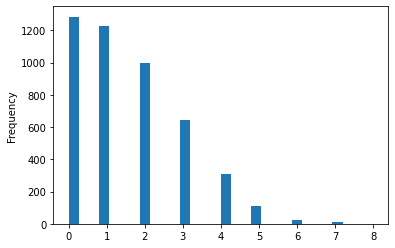

In [496]:
deltas_clean[deltas_clean>= pd.Timedelta(0)].astype('timedelta64[D]').plot.hist(bins = 30)

<AxesSubplot:ylabel='Frequency'>

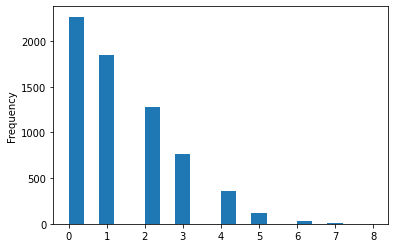

In [477]:
deltas_clean_abs.astype('timedelta64[D]').plot.hist(bins = 20)

In [478]:
deliveries["deltas"] = deltas.astype('timedelta64[D]')

In [479]:
deliveries_clean = deliveries.dropna()

In [480]:
import numpy as np

In [481]:
deliveries_clean.groupby("delivery_company")["deltas"].agg([np.mean,np.std])

,mean,std
delivery_company,,
360.0,0.485053,2.072962
516.0,0.528329,2.051740
620.0,0.506548,2.009850


<AxesSubplot:title={'center':'deltas'}, xlabel='delivery_company'>

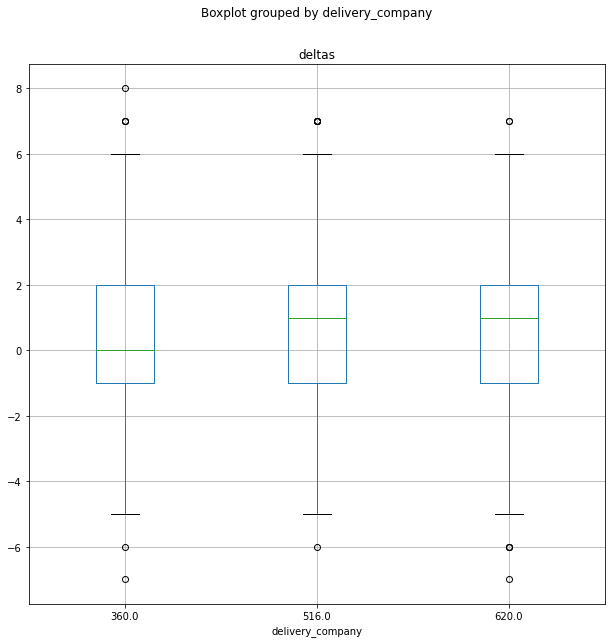

In [482]:
deliveries_clean.boxplot(column="deltas",by='delivery_company',figsize=(10,10))

In [483]:
deliveries.describe()

,purchase_id,delivery_company,deltas
count,7040.00000,6687.000000,6672.000000
mean,23520.50000,500.253028,0.506445
std,2032.41728,106.626291,2.043879
min,20001.00000,360.000000,-7.000000
25%,21760.75000,360.000000,-1.000000
50%,23520.50000,516.000000,0.000000
75%,25280.25000,620.000000,2.000000
max,27040.00000,620.000000,8.000000


Text(0, 0.5, 'User count')

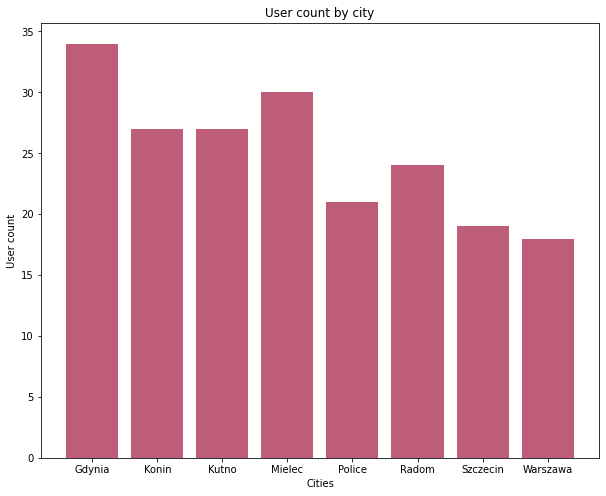

In [484]:
cityCount = d.users.groupby('city', as_index=False).user_id.count()
plt.figure(figsize=(10, 8))
plt.bar(cityCount.city, cityCount.user_id, color='#BE5D77')
plt.title("User count by city")
plt.xlabel("Cities")
plt.ylabel("User count")

In [485]:
deliveries_ses_user = deliveries_clean.merge(d.sessions[['user_id', 'purchase_id', 'product_id']], on='purchase_id')
deliveries_ses_user = deliveries_ses_user.merge(d.users[['user_id','city']], on='user_id')

<AxesSubplot:title={'center':'deltas'}, xlabel='city'>

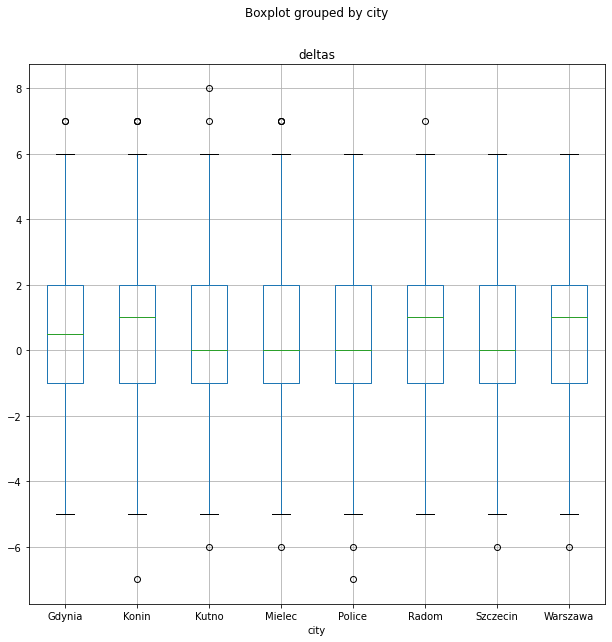

In [486]:
deliveries_ses_user.boxplot(column="deltas",by='city',figsize=(10,10))

Text(0, 0.5, 'Deliveries mean')

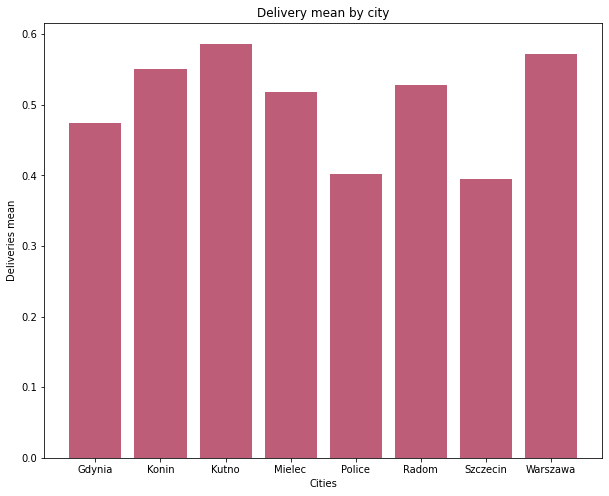

In [487]:
deliveries_city = deliveries_ses_user.groupby('city', as_index=False).deltas.mean()
plt.figure(figsize=(10, 8))
plt.bar(deliveries_city.city, deliveries_city.deltas, color='#BE5D77')
plt.title("Delivery mean by city")
plt.xlabel("Cities")
plt.ylabel("Deliveries mean")

,purchase_id,delivery_company,deltas,user_id,product_id
count,5991.000000,5991.000000,5991.000000,5991.000000,5702.000000
mean,23521.500918,500.289768,0.500250,202.858287,1160.541915
std,2029.937901,106.727363,2.048239,56.240529,124.391996
min,20001.000000,360.000000,-7.000000,102.000000,1001.000000
25%,21766.500000,360.000000,-1.000000,155.000000,1040.000000
50%,23526.000000,516.000000,0.000000,202.000000,1201.000000
75%,25279.500000,620.000000,2.000000,252.000000,1283.000000
max,27040.000000,620.000000,8.000000,301.000000,1319.000000


In [488]:
deliveries_ses_user_prod = deliveries_ses_user.merge(products, on='product_id')


In [489]:
deliveries_ses_user_prod

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,deltas,user_id,product_id,city,product_name,price,primary_category,secondary_category,tertiary_category,quaternary_category
0,20001,2021-02-16 22:56:36,2021-02-21 00:39:10.536911,360.0,4.0,102.0,1222.0,Kutno,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
1,20033,2021-03-11 10:57:49,2021-03-09 08:32:30.845717,516.0,-3.0,102.0,1222.0,Kutno,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
2,20091,2021-01-19 15:28:12,2021-01-18 00:29:06.809978,620.0,-2.0,103.0,1222.0,Mielec,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
3,20105,2021-01-28 13:18:51,2021-02-02 06:34:52.671013,360.0,4.0,103.0,1222.0,Mielec,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
4,20181,2021-01-11 13:21:20,2021-01-11 17:17:43.827780,360.0,0.0,108.0,1222.0,Gdynia,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697,25490,2021-03-10 21:26:02,2021-03-10 14:44:11.702221,620.0,-1.0,258.0,1040.0,Police,Crysis 2 (PS3),-79.9,Gry i konsole,Gry na konsole,Gry PlayStation3,None
5698,25652,2021-01-21 12:04:38,2021-01-22 11:35:27.371368,620.0,0.0,263.0,1040.0,Mielec,Crysis 2 (PS3),-79.9,Gry i konsole,Gry na konsole,Gry PlayStation3,None
5699,25743,2021-03-14 17:50:14,2021-03-20 01:09:03.828943,516.0,5.0,265.0,1040.0,Police,Crysis 2 (PS3),-79.9,Gry i konsole,Gry na konsole,Gry PlayStation3,None
5700,25762,2021-02-05 02:21:59,2021-02-05 18:01:23.276859,360.0,0.0,266.0,1040.0,Mielec,Crysis 2 (PS3),-79.9,Gry i konsole,Gry na konsole,Gry PlayStation3,None


<AxesSubplot:title={'center':'deltas'}, xlabel='primary_category'>

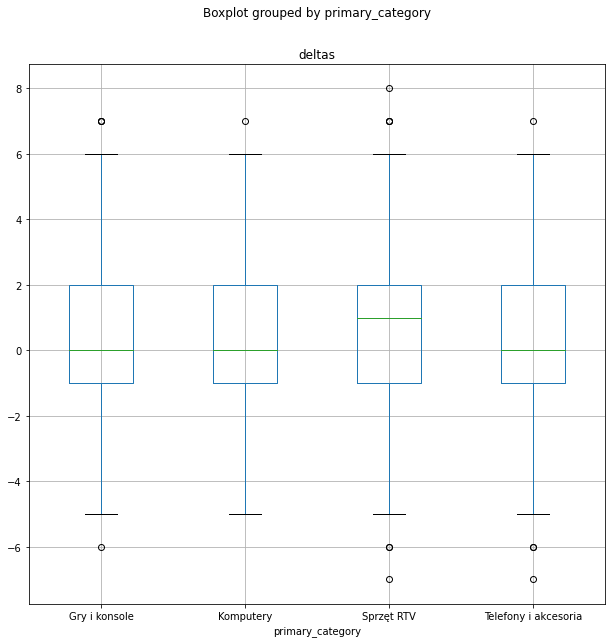

In [491]:
deliveries_ses_user_prod.boxplot(column="deltas",by='primary_category',figsize=(10,10))

In [510]:
deliveries_ses_user_prod_abs = deliveries_ses_user_prod[deliveries_ses_user_prod['deltas'] < 0]

In [511]:
deliveries_ses_user_prod_abs

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,deltas,user_id,product_id,city,product_name,price,primary_category,secondary_category,tertiary_category,quaternary_category
1,20033,2021-03-11 10:57:49,2021-03-09 08:32:30.845717,516.0,-3.0,102.0,1222.0,Kutno,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
2,20091,2021-01-19 15:28:12,2021-01-18 00:29:06.809978,620.0,-2.0,103.0,1222.0,Mielec,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
7,20351,2021-01-27 11:16:40,2021-01-26 04:16:09.156199,620.0,-2.0,115.0,1222.0,Szczecin,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
10,20560,2021-01-06 11:02:04,2021-01-06 04:21:53.364867,516.0,-1.0,120.0,1222.0,Radom,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
15,20868,2021-02-11 10:33:18,2021-02-10 07:50:58.084460,620.0,-2.0,128.0,1222.0,Szczecin,Parrot Minikit NEO,245.0,Telefony i akcesoria,Akcesoria telefoniczne,Zestawy głośnomówiące,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5688,23179,2021-02-24 23:24:46,2021-02-24 19:15:03.818648,516.0,-1.0,194.0,1040.0,Konin,Crysis 2 (PS3),-79.9,Gry i konsole,Gry na konsole,Gry PlayStation3,None
5690,23716,2021-02-08 23:41:30,2021-02-07 02:57:40.677807,620.0,-2.0,208.0,1040.0,Mielec,Crysis 2 (PS3),-79.9,Gry i konsole,Gry na konsole,Gry PlayStation3,None
5693,24474,2021-01-19 15:02:42,2021-01-18 03:27:47.769228,620.0,-2.0,229.0,1040.0,Gdynia,Crysis 2 (PS3),-79.9,Gry i konsole,Gry na konsole,Gry PlayStation3,None
5697,25490,2021-03-10 21:26:02,2021-03-10 14:44:11.702221,620.0,-1.0,258.0,1040.0,Police,Crysis 2 (PS3),-79.9,Gry i konsole,Gry na konsole,Gry PlayStation3,None
